In [3]:
import os, sys, numpy as np, matplotlib.pyplot as plt, matplotlib.colors, matplotlib.cm as cm 
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

home = os.path.abspath( os.getcwd() + "/.." )
sys.path.append(home)

from genam.configuration.source import ( 
  piston_model_matrix, 
  inlet_grid, 
  transducer_grid, 
  transducer_inlet_grid, 
  plotter, 
  write_complex_pressure_inlet, 
  configurator as source_configurator
)




d: 0.2 t: 8 1 m: 16 3


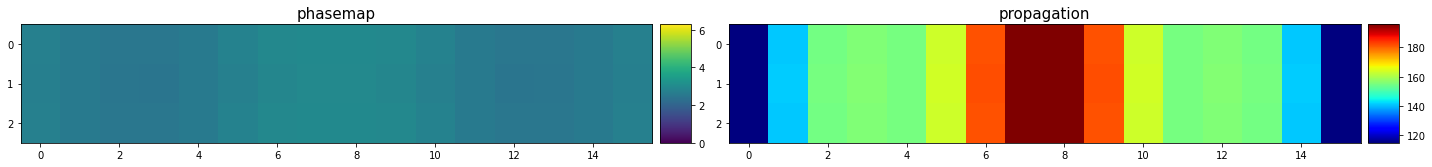

d: 0.02 t: 1 1 m: 1 1


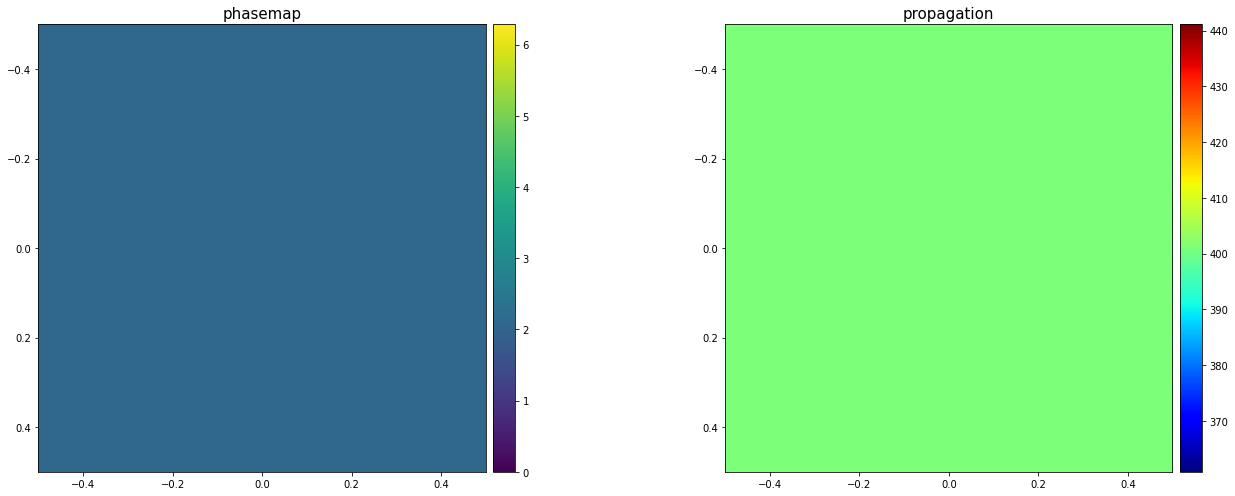

d: 0.02 t: 1 1 m: 2 2


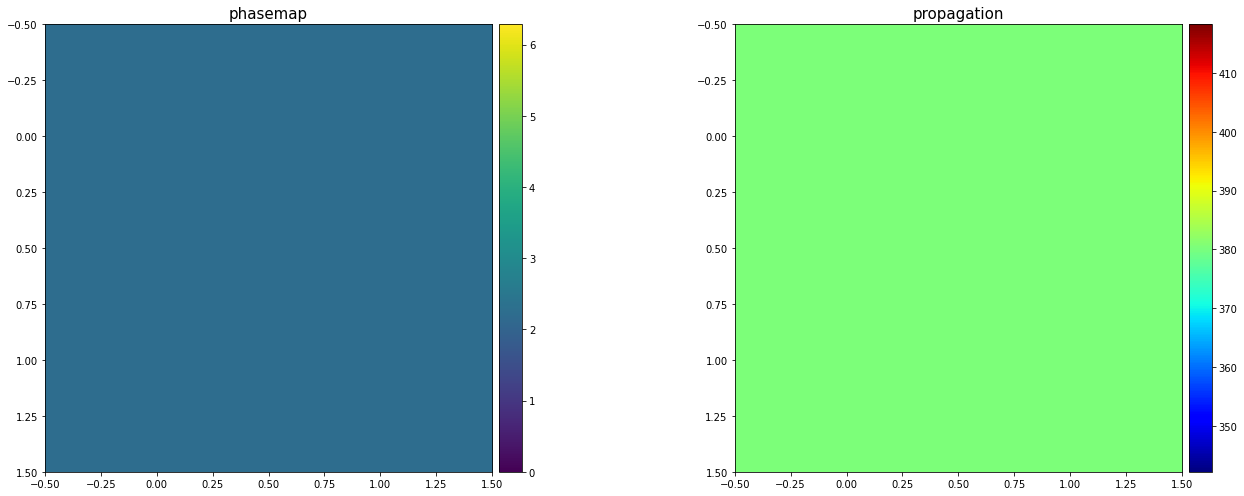

d: 0.02 t: 2 2 m: 2 2


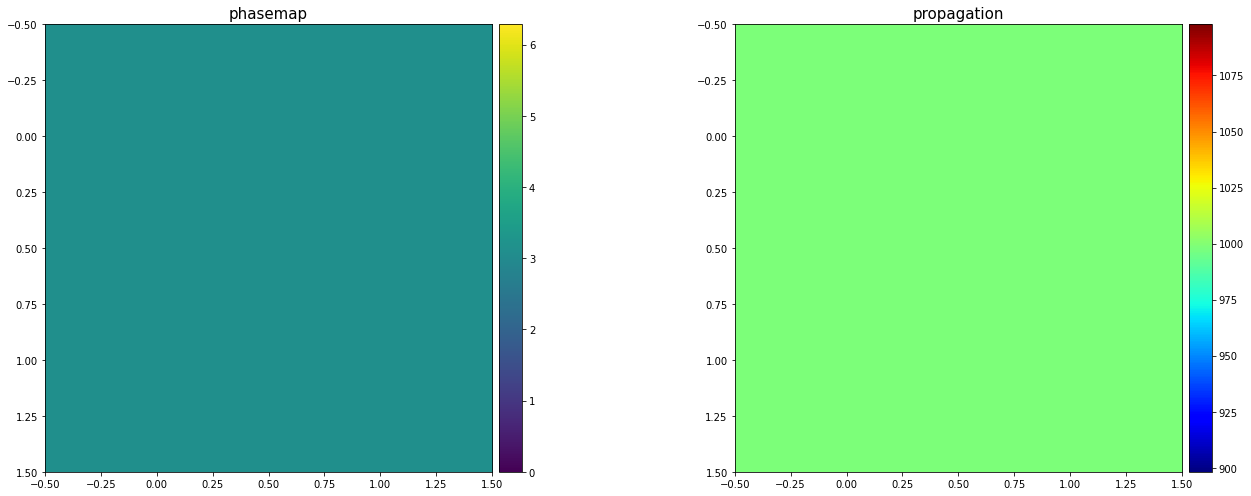

d: 0.02 t: 2 2 m: 4 4


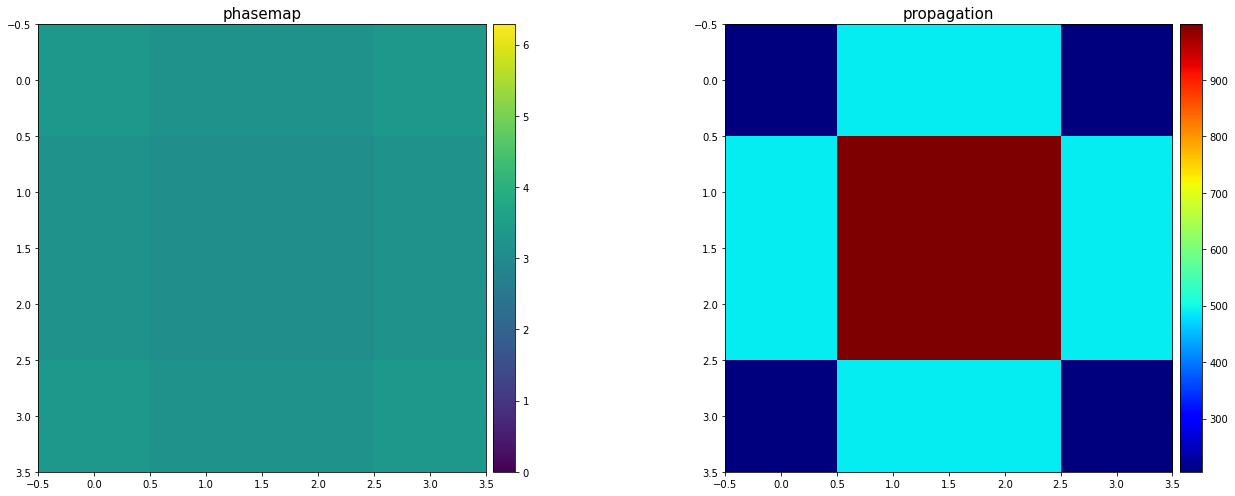

d: 0.02 t: 4 4 m: 4 4


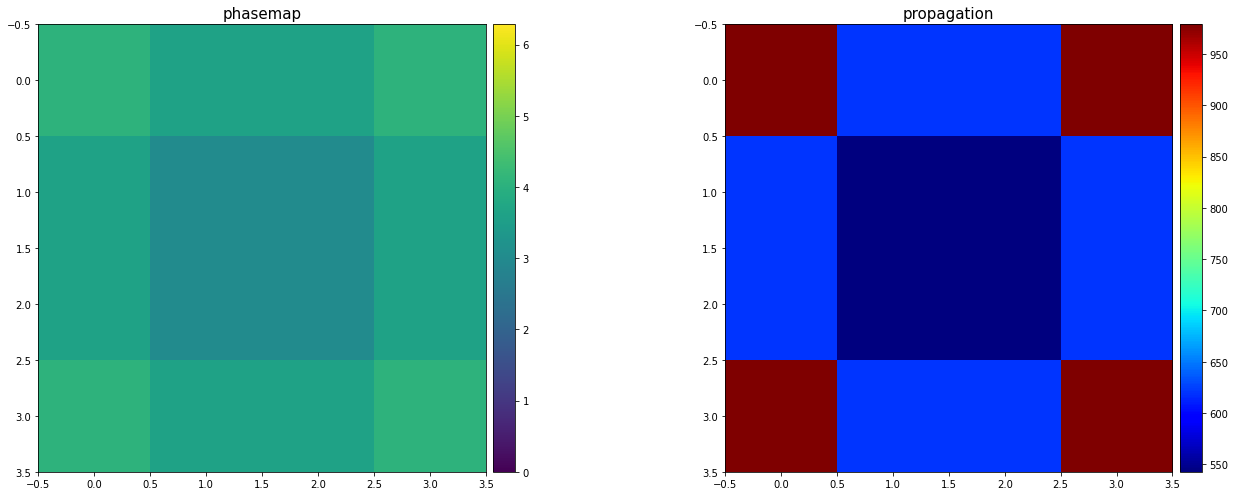

d: 0.002 t: 4 4 m: 4 4


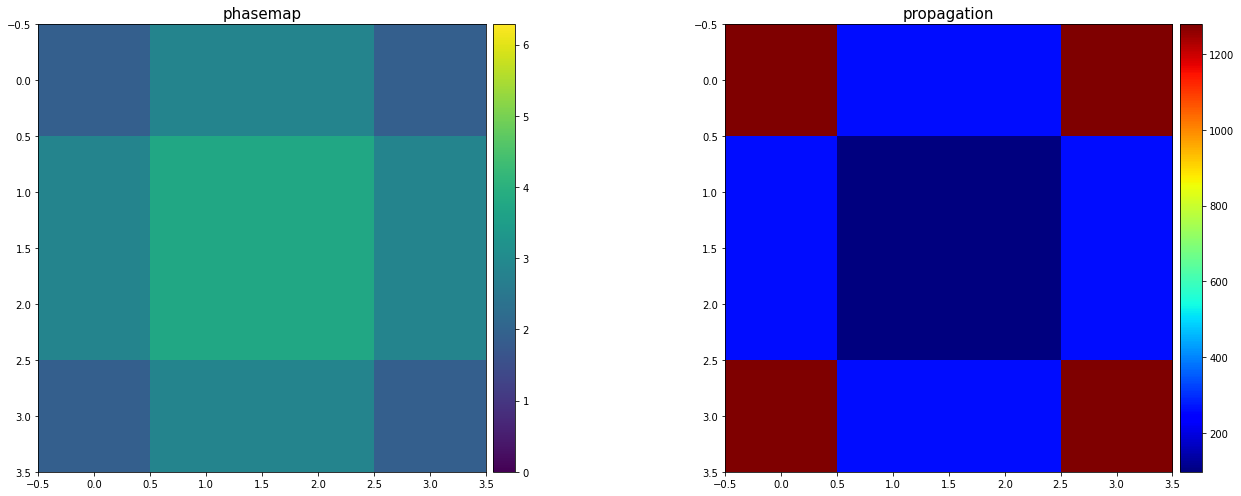

d: 0.2 t: 4 4 m: 4 4


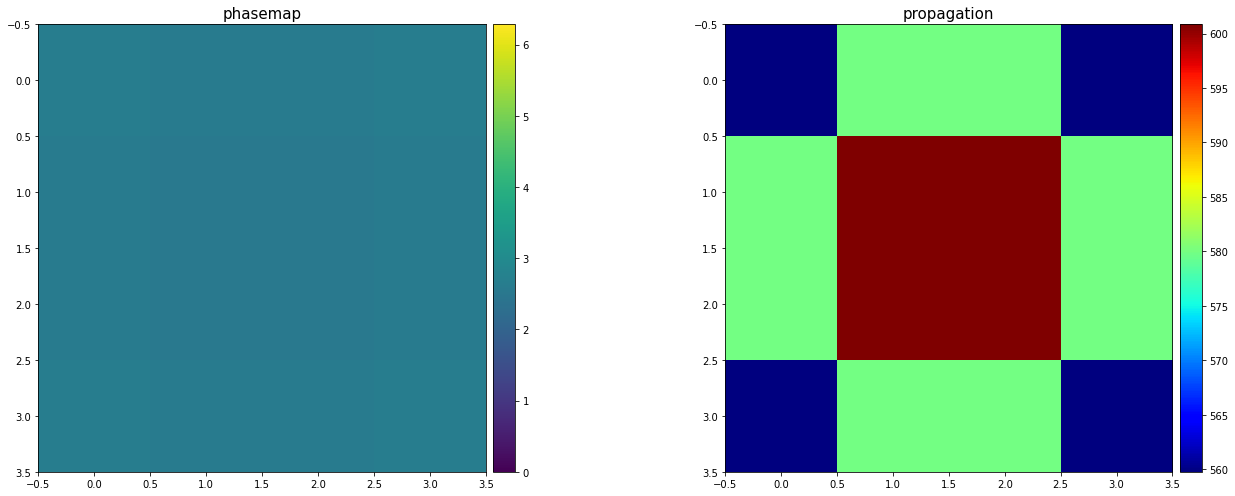

d: 0.02 t: 2 2 m: 8 8


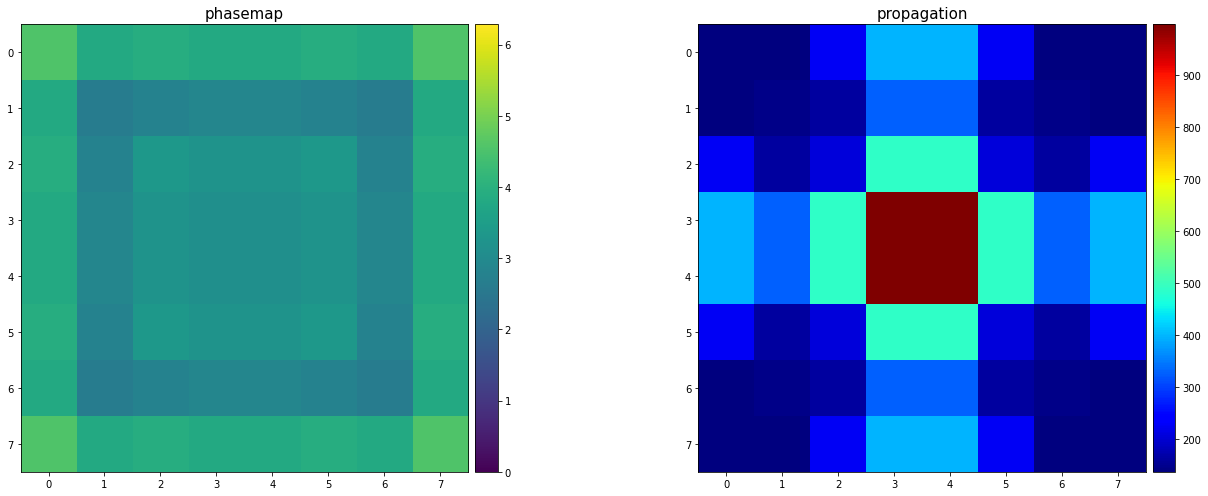

d: 0.02 t: 4 4 m: 8 8


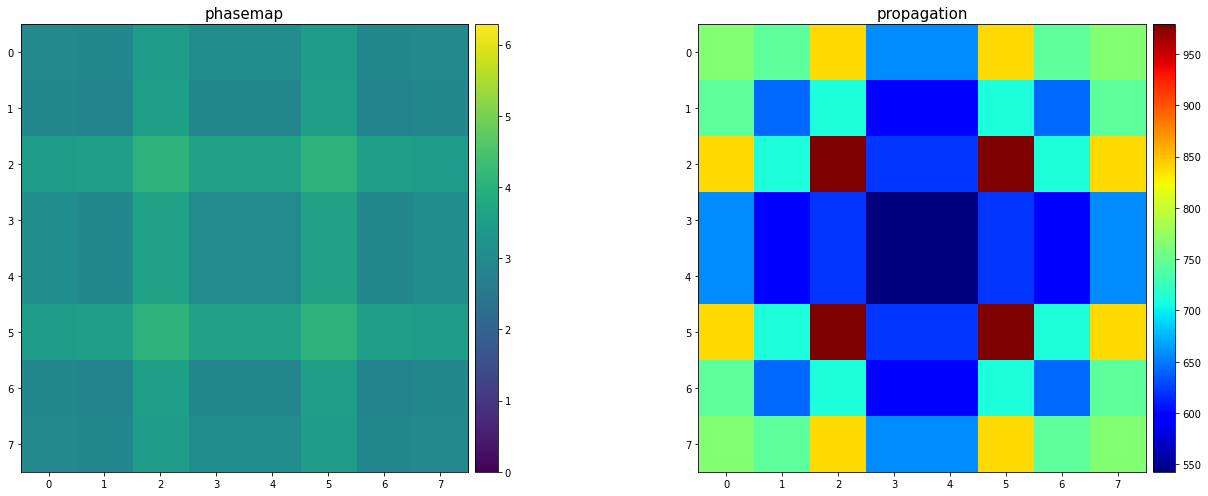

d: 0.02 t: 8 8 m: 8 8


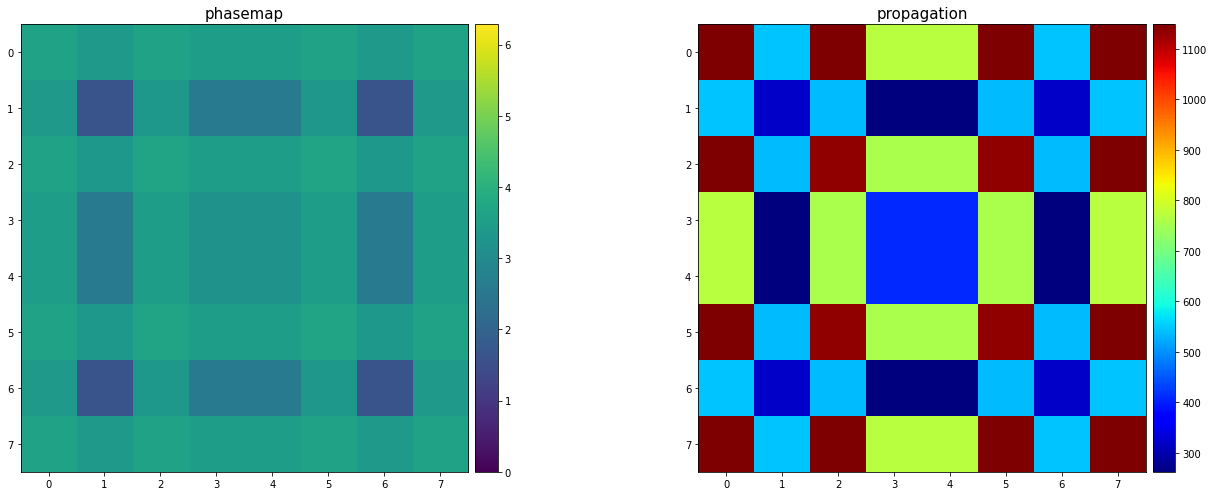

d: 0.02 t: 2 2 m: 16 16


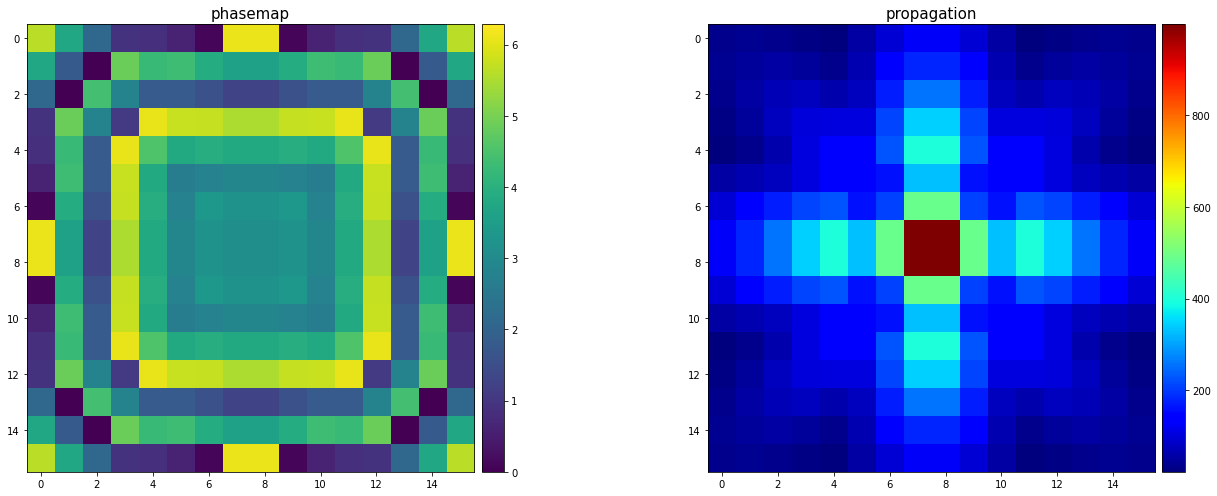

d: 0.02 t: 4 4 m: 16 16


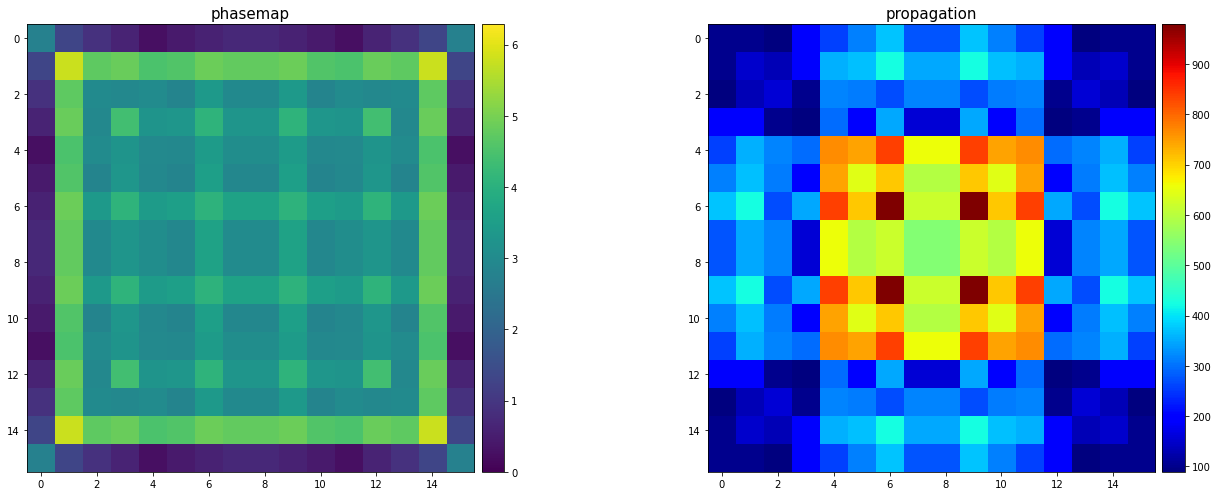

d: 0.02 t: 8 8 m: 16 16


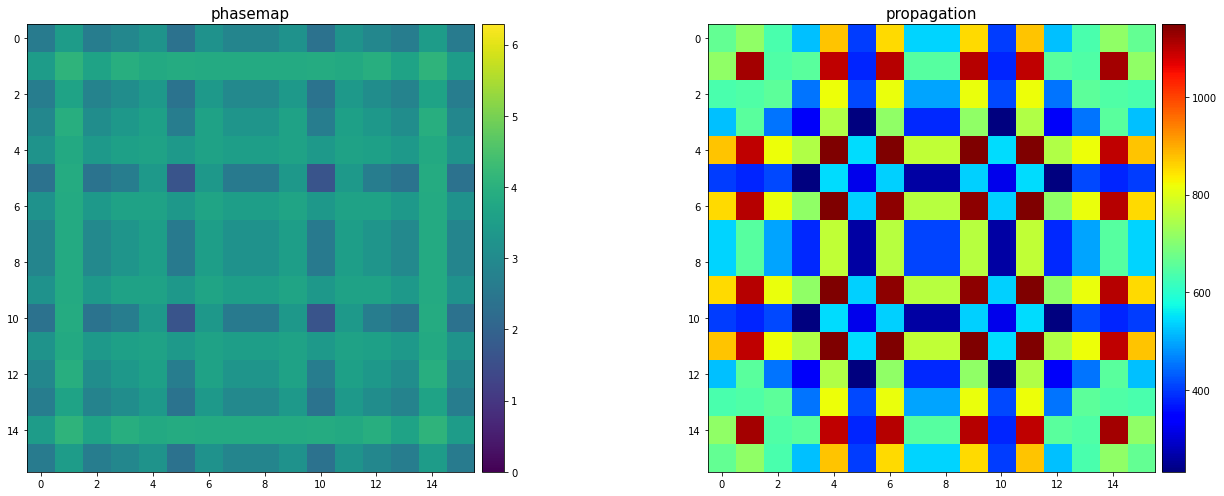

d: 0.02 t: 8 1 m: 16 3


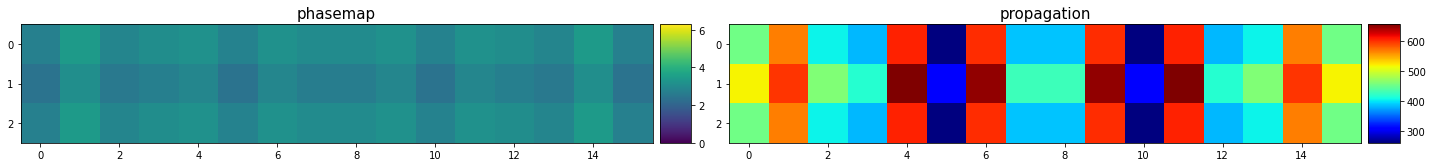

d: 0.002 t: 8 1 m: 16 3


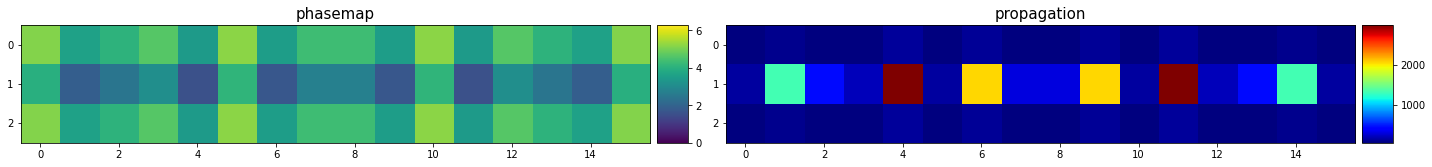

d: 0.02 t: 1 8 m: 16 3


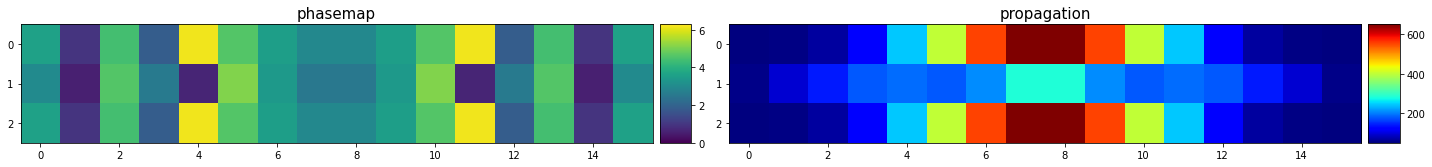

d: 0.2 t: 1 8 m: 3 16


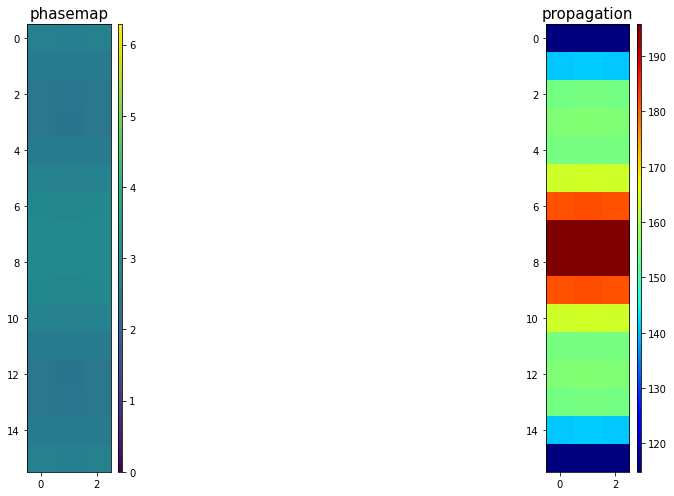

d: 0.02 t: 1 8 m: 3 16


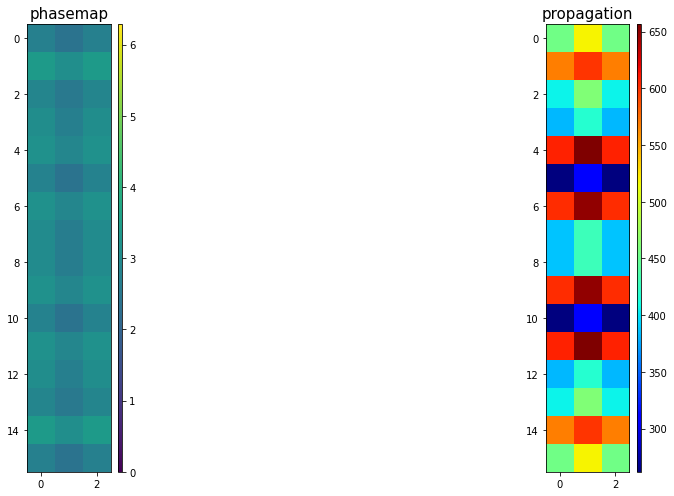

In [17]:

quantized_matrix_16_3 = np.array([
                                  [  9, 13,  1,  4,  5,  6,  7,  7,  7,  7,  6,  5,  4,  1, 13,  9 ], #6
                                  [ 10, 13,  0,  3,  5,  6,  7,  8,  8,  7,  6,  5,  3,  0, 13, 10 ], #7 
                                  [  9, 13,  1,  4,  5,  6,  7,  7,  7,  7,  6,  5,  4,  1, 13,  9 ], #9
                                ])

lens_config = lens_configurator( quantized_matrix_16_3 )

config = source_configurator(  0.2, 
                  8, 1,       # transducer columns * rows configuration  
                  16, 3,      # metasurface unit cell configuration
                  p0 = 8.02   # reference pressure
                )

config.propagate() 

print(f"d: {config.dist} t: {config.tm} {config.tn} m: {config.m} {config.n}"  )
plotter(config.Pf)

configs = []
configs.append( source_configurator(  0.02, 1, 1,  1,  1, p0 = 8.02 ) )  
configs.append( source_configurator(  0.02, 1, 1,  2,  2, p0 = 8.02 ) )  
configs.append( source_configurator(  0.02, 2, 2,  2,  2, p0 = 8.02 ) ) 
configs.append( source_configurator(  0.02, 2, 2,  4,  4, p0 = 8.02 ) ) 
configs.append( source_configurator(  0.02, 4, 4,  4,  4, p0 = 8.02 ) ) 
configs.append( source_configurator( 0.002, 4, 4,  4,  4, p0 = 8.02 ) ) 
configs.append( source_configurator(   0.2, 4, 4,  4,  4, p0 = 8.02 ) ) 
configs.append( source_configurator(  0.02, 2, 2,  8,  8, p0 = 8.02 ) ) 
configs.append( source_configurator(  0.02, 4, 4,  8,  8, p0 = 8.02 ) ) 
configs.append( source_configurator(  0.02, 8, 8,  8,  8, p0 = 8.02 ) ) 
configs.append( source_configurator(  0.02, 2, 2, 16, 16, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 4, 4, 16, 16, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 8, 8, 16, 16, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 8, 1, 16,  3, p0 = 8.02 ) )
configs.append( source_configurator( 0.002, 8, 1, 16,  3, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 1, 8, 16,  3, p0 = 8.02 ) )
configs.append( source_configurator(   0.2, 1, 8,  3, 16, p0 = 8.02 ) )
configs.append( source_configurator(  0.02, 1, 8,  3, 16, p0 = 8.02 ) )

for i in range(len(configs)) : 
  configs[i].propagate()

for config in configs: 
  print(f"d: {config.dist} t: {config.tm} {config.tn} m: {config.m} {config.n}"  )
  plotter(config.Pf)


